<a href="https://colab.research.google.com/github/saikumartech/DS-Practice/blob/main/Chapter_3%2C_Model_3_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Model 3.6 - Convolutional Neural Network with Batch Normalization on CIFAR-10

In this example, we will modify the previous CNN model by adding **Batch Normalization** after each convolutional layer. Batch normalization helps to stabilize and accelerate the training of deep neural networks by normalizing the inputs to each layer.

We will also train the model on the CIFAR-10 dataset, using a similar architecture to the previous models but with batch normalization included.


In [ ]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import layers


### Step 1: Load and Preprocess the CIFAR-10 Dataset

We will load the CIFAR-10 dataset, normalize the pixel values, and convert the labels to one-hot encoding as we did in previous models. This time, the focus will be on adding batch normalization in the model architecture.


In [ ]:
# Load the CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

# Preprocess the data: Normalize the pixel values to the range [0, 1]
x_train, x_test = x_train / 255.0, x_test / 255.0

# Convert labels to one-hot encoding
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)


170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


### Step 2: Build the CNN Model with Batch Normalization

In this model, after each convolutional layer, we add a `BatchNormalization` layer. This helps to stabilize and speed up training by normalizing the inputs to the next layer.

We will also use three convolutional layers with max-pooling, followed by a dense layer.


In [ ]:
# Build the CNN model with Batch Normalization
model_3_6 = keras.Sequential([
    # First convolutional layer with batch normalization
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),

    # Second convolutional layer with batch normalization
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),

    # Third convolutional layer with batch normalization
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.BatchNormalization(),

    layers.Flatten(),

    # Fully connected layer
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


### Step 3: Compile and Train the Model with Batch Normalization

We will compile the model with the Adam optimizer and categorical cross-entropy loss. The model will be trained for 10 epochs, using the CIFAR-10 test set for validation. The batch normalization will help accelerate the convergence during training.


In [ ]:
# Compile the model
model_3_6.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

# Train the model
history_3_6 = model_3_6.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))


Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 111s 69ms/step - accuracy: 0.4479 - loss: 1.5816 - val_accuracy: 0.5560 - val_loss: 1.2494
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 142s 69ms/step - accuracy: 0.6601 - loss: 0.9660 - val_accuracy: 0.6385 - val_loss: 1.0353
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 110s 70ms/step - accuracy: 0.7235 - loss: 0.7926 - val_accuracy: 0.6102 - val_loss: 1.1573
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 137s 67ms/step - accuracy: 0.7591 - loss: 0.6856 - val_accuracy: 0.5527 - val_loss: 1.4715
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 111s 71ms/step - accuracy: 0.7876 - loss: 0.6040 - val_accuracy: 0.6798 - val_loss: 0.9902
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 114s 73ms/step - accuracy: 0.8142 - loss: 0.5318 - val_accuracy: 0.7042 - val_loss: 0.9344
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 137s 69ms/step - accuracy: 0.8340 - loss: 0.4715 - val_accuracy: 0.6835 - val_loss: 0.9984
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 139s 68ms/step - accuracy: 

### Step 4: Plot Training and Validation Accuracy

Finally, we can visualize the training and validation accuracy over the epochs to evaluate the effect of batch normalization on model performance.


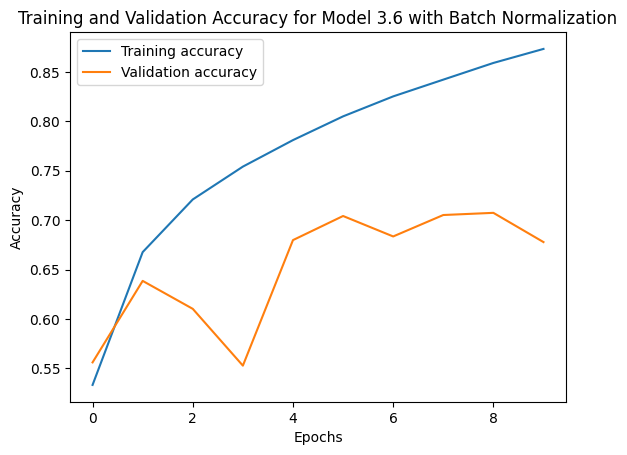

In [ ]:
# Plot training and validation accuracy
plt.plot(history_3_6.history['accuracy'], label='Training accuracy')
plt.plot(history_3_6.history['val_accuracy'], label='Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy for Model 3.6 with Batch Normalization')
plt.show()
